In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

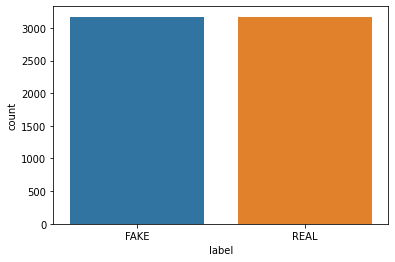

In [4]:
sns.countplot(df["label"])

In [5]:
texts = ["Hi This is a fun project!", "I can detect fake news"]

vector = TfidfVectorizer()

vector.fit(texts)

TfidfVectorizer()

In [6]:
# Tfidf scores for each word
print(vector.idf_)

[1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511]


In [7]:
print(vector.vocabulary_)

{'hi': 4, 'this': 8, 'is': 5, 'fun': 3, 'project': 7, 'can': 0, 'detect': 1, 'fake': 2, 'news': 6}


In [8]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


#############################

In [9]:
# Preparing X and Y for the model
X,Y = df["text"], df["label"]

# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=123)

# Vectors creation
tfvector = TfidfVectorizer(stop_words="english", max_df=0.75)

# Fit train data
tfidf_x_train = tfvector.fit_transform(x_train)
tfidf_x_test = tfvector.transform(x_test)



In [12]:
# Classifier
classifier = PassiveAggressiveClassifier(max_iter=10)
classifier.fit(tfidf_x_train, y_train)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


PassiveAggressiveClassifier(max_iter=10)

In [13]:
# Predict 
y_prediction = classifier.predict(tfidf_x_test)

In [14]:
# Accuracy score
score = accuracy_score(y_test, y_prediction)
print(f"Accuracy = {score}")

Accuracy = 0.9206313416009019


In [15]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_prediction)
print(f"Confusion Matrix:\n{conf_mat}")

Confusion Matrix:
[[2058  156]
 [ 196 2025]]


In [16]:
# Testing the classifier on a different dataset
df2 = pd.read_csv("train.csv")

# Dropping NA
df2 = df2.dropna()

print(f"Text:{df2['text']}, Label={df2['label']}")

Text:0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object, Label=0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64


In [17]:
idx = 10
df2["text"][idx], df2["label"][idx]

('Organizing for Action, the activist group that morphed from Barack Obama’s first presidential campaign, has partnered with the   Indivisible Project for “online trainings” on how to protest President Donald Trump’s agenda. [Last week, Breitbart News extensively reported that Indivisible leaders are openly associated with groups financed by billionaire George Soros.  Politico earlier this month profiled Indivisible in an article titled, “Inside the protest movement that has Republicans reeling. ”  The news agency not only left out the Soros links, but failed to note that the organizations cited in its article as helping to amplify Indivisible’s message are either financed directly by Soros or have close ties to groups funded by the billionaire, as Breitbart News documented. Organizing for Action (OFA) is a   community organizing project that sprung from Obama’s 2012 campaign organization, Organizing for America, becoming a nonprofit described by the Washington Post as “advocate[ing] f

In [18]:
# Predict module

def fake_news(news_input: list, labels=df2["label"]):

    # To do : tfvector obj creation, classifier obj creation 
    vector = tfvector.transform(news_input)
    pred = classifier.predict(vector)

    # Accuracy
    print(f"accuracy_score = {accuracy_score(pred, labels)}")

    
        #print(f"Prediction for news_input = \n{pred}\n {print(type(pred))}")


In [19]:
#fake_news(["apple is a fruit"])

ValueError: Found input variables with inconsistent numbers of samples: [1, 18285]

In [ ]:
df2.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [20]:
fake_news(df2["text"])

accuracy_score = 0.0


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:208: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [21]:
true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

In [26]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [28]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [24]:
true["label"] = 1
false["label"] = 0

In [29]:
df = pd.DataFrame(true)
df = df.append(false)

In [31]:
df.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [32]:
cols = ["subject", "date"]
df = df.drop(columns=cols)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   label   44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
# Preparing X and Y for the model
X,Y = df["text"], df["label"]

# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=123)

# Vectors creation
tfvector = TfidfVectorizer(stop_words="english", max_df=0.75)

# Fit train data
tfidf_x_train = tfvector.fit_transform(x_train)
tfidf_x_test = tfvector.transform(x_test)
